In [12]:
# Pickle tested with python 3.8.8

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
def logform(val, tick_number):
    return f"{10**val:.2E}"

path = "./Gamma Data/gammas_detected_0.pkl"
data = pd.read_pickle(path)

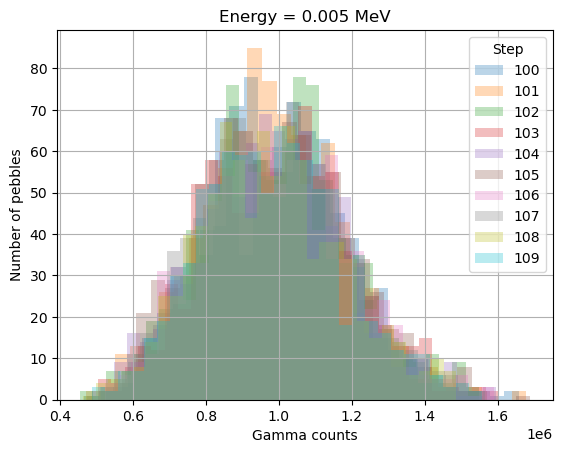

In [2]:
# Get gamma count distribution for one energy bin for 10 steps
E = 0.005
for step in range(100,110):
    values = data.loc[step, E].T
    plt.hist(values,bins=30, alpha=0.3, label=step)
plt.legend(title='Step')
plt.xlabel('Gamma counts')
plt.ylabel('Number of pebbles')
plt.title(f'Energy = {E} MeV')
plt.grid()

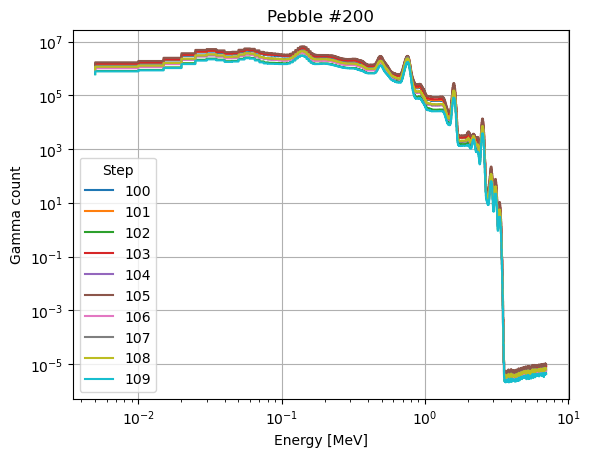

In [3]:
# Get gamma spectrum on a pebble for 10 steps
i_pebble = 200
for step in range(100,110):
    values = data.swaplevel(axis=1)[i_pebble]
    plt.step(values.columns, values.loc[step], label=step)
plt.legend(title='Step')
plt.xlabel('Energy [MeV]')
plt.ylabel('Gamma count')
plt.title(f'Pebble #{i_pebble}')
plt.grid()
plt.yscale('log')
plt.xscale('log')


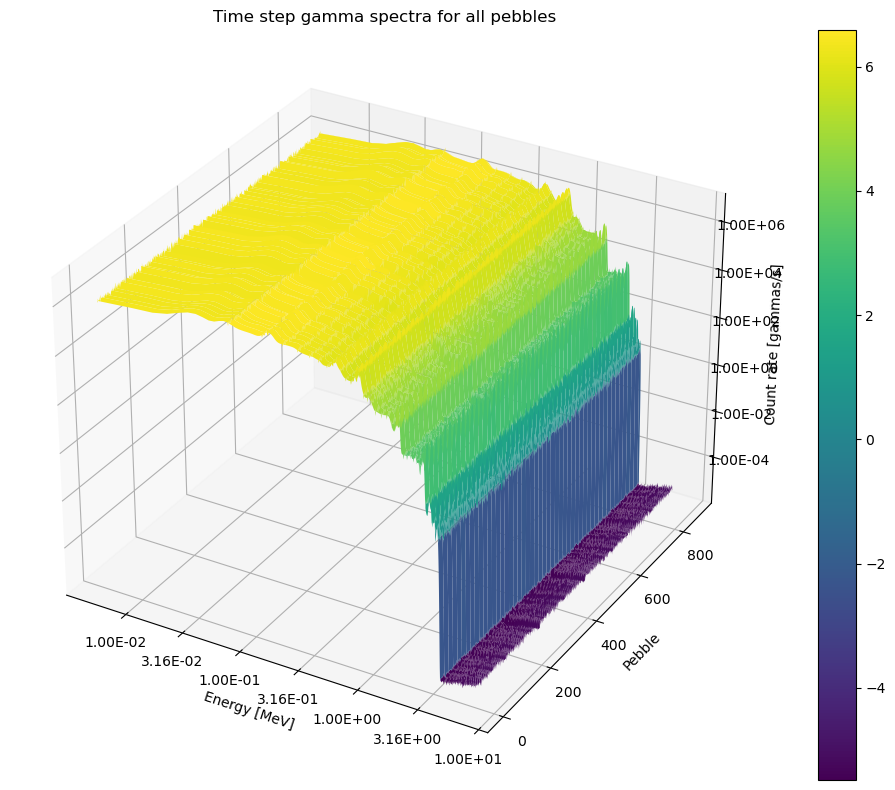

In [13]:
# Make 2D surface of a given time step

table = data.loc[step].unstack().T
x = np.log10(table.columns.astype(float).values)
y = table.index.astype(float).values
X, Y = np.meshgrid(x, y)
Z = np.log10(table.values)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(logform))
ax.zaxis.set_major_formatter(ticker.FuncFormatter(logform))

# Add labels and title
ax.set_xlabel('Energy [MeV]')
ax.set_ylabel('Pebble')
ax.set_zlabel('Count rate [gammas/s]')
ax.set_title(f'Time step gamma spectra for all pebbles')

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.tight_layout()
plt.show()

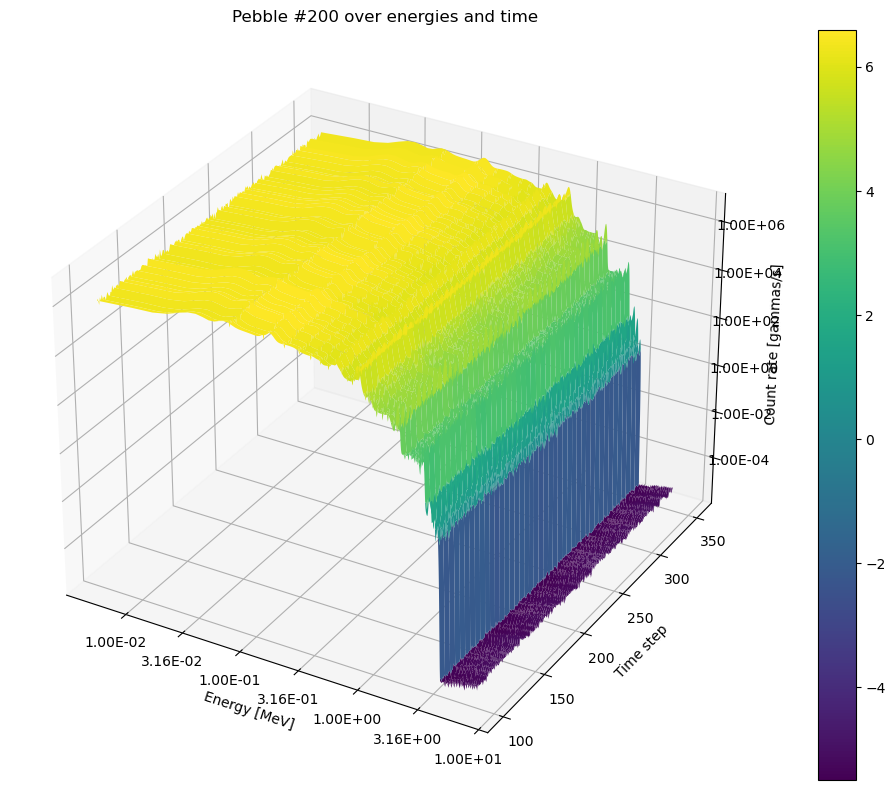

In [5]:
# Make 2D surface of a given pebble over time

i_pebble = 200
table = data.swaplevel(axis=1)[i_pebble]

x = np.log10(table.columns.astype(float).values)
y = table.index.astype(float).values
X, Y = np.meshgrid(x, y)
Z = np.log10(table.values)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(logform))
ax.zaxis.set_major_formatter(ticker.FuncFormatter(logform))

# Add labels and title
ax.set_xlabel('Energy [MeV]')
ax.set_ylabel('Time step')
ax.set_zlabel('Count rate [gammas/s]')
ax.set_title(f'Pebble #{i_pebble} over energies and time')

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.tight_layout()
plt.show()

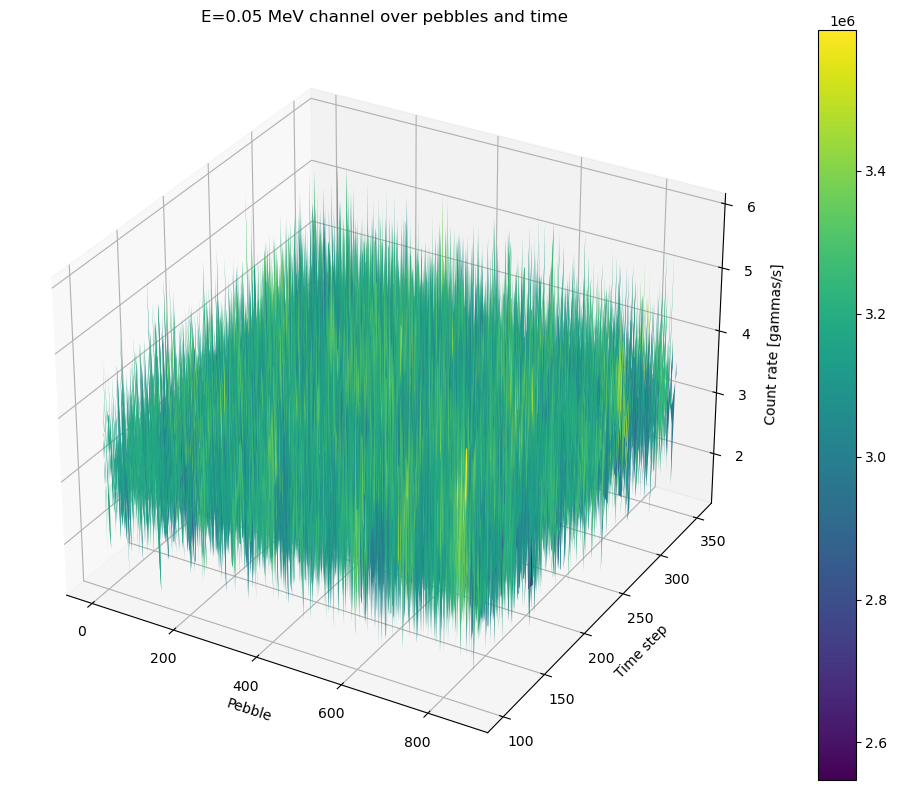

In [10]:
# Make 2D surface for a given energy for pebbles over time
E = 0.05 # MeV
table = data[E]

x = table.columns.astype(float).values
y = table.index.astype(float).values
X, Y = np.meshgrid(x, y)
Z = table.values

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)

# Add labels and title
ax.set_xlabel('Pebble')
ax.set_ylabel('Time step')
ax.set_zlabel('Count rate [gammas/s]')
ax.set_title(f'E={E} MeV channel over pebbles and time')

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.tight_layout()
plt.show()